In [1]:
import pandas as pd
data = pd.read_csv("Test_Zinc.csv", sep=',', header=0, encoding = "ISO-8859-1", engine='python')
data.shape

(221, 6)

In [2]:
data

_classname  \
0    Windows64.Zinc.Tests.ZnBivalentWriteStreamTest   
1    Windows64.Zinc.Tests.ZnBivalentWriteStreamTest   
2          Windows64.Zinc.Tests.ZnChunkedStreamTest   
3          Windows64.Zinc.Tests.ZnChunkedStreamTest   
4          Windows64.Zinc.Tests.ZnChunkedStreamTest   
..                                              ...   
216                Windows64.Zinc.Tests.ZnUtilsTest   
217                Windows64.Zinc.Tests.ZnUtilsTest   
218                Windows64.Zinc.Tests.ZnUtilsTest   
219                Windows64.Zinc.Tests.ZnUtilsTest   
220                Windows64.Zinc.Tests.ZnUtilsTest   

                                 _name  _time failure/_type failure/_message  \
0                      testByteWriting  0.000           NaN              NaN   
1                 testCharacterWriting  0.000           NaN              NaN   
2                  testBinaryWriteRead  0.000           NaN              NaN   
3                    testGzipWriteRead  5.764           NaN              NaN   
4                          testReading  0.000           NaN              NaN   
..                                 ...    ...           ...              ...   
216           testReadUpToEndNonBinary  0.005           NaN              NaN   
217                testStreamingBinary  0.004           NaN              NaN   
218     testStreamingBinaryWithoutSize  0.044           NaN              NaN   
219             testStreamingNonBinary  0.003           NaN              NaN   
220  testStreamingNonBinaryWithoutSize  0.043           NaN              NaN   

    failure/__text  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
..             ...  
216            NaN  
217            NaN  
218            NaN  
219            NaN  
220            NaN  

[221 rows x 6 columns]

In [3]:
columns = data.columns
data = data.rename({columns[0]: "Class", columns[1]: "Name", columns[2]: "Time", columns[3]: "Failure_Type", columns[4]: "Failure_Message", columns[5]: "Failure_Text"}, axis='columns')

In [4]:
data_time = data.dropna(axis=1)

In [5]:
data_time

Class  \
0    Windows64.Zinc.Tests.ZnBivalentWriteStreamTest   
1    Windows64.Zinc.Tests.ZnBivalentWriteStreamTest   
2          Windows64.Zinc.Tests.ZnChunkedStreamTest   
3          Windows64.Zinc.Tests.ZnChunkedStreamTest   
4          Windows64.Zinc.Tests.ZnChunkedStreamTest   
..                                              ...   
216                Windows64.Zinc.Tests.ZnUtilsTest   
217                Windows64.Zinc.Tests.ZnUtilsTest   
218                Windows64.Zinc.Tests.ZnUtilsTest   
219                Windows64.Zinc.Tests.ZnUtilsTest   
220                Windows64.Zinc.Tests.ZnUtilsTest   

                                  Name   Time  
0                      testByteWriting  0.000  
1                 testCharacterWriting  0.000  
2                  testBinaryWriteRead  0.000  
3                    testGzipWriteRead  5.764  
4                          testReading  0.000  
..                                 ...    ...  
216           testReadUpToEndNonBinary  0.005  
217                testStreamingBinary  0.004  
218     testStreamingBinaryWithoutSize  0.044  
219             testStreamingNonBinary  0.003  
220  testStreamingNonBinaryWithoutSize  0.043  

[221 rows x 3 columns]

In [6]:
import matplotlib.pyplot as plt
import numpy as np

We can see here the global behaviour of the execution time inside the Zinc package. <br>
We observe that most of the tests take around 0.0 seconds to complete. <br>

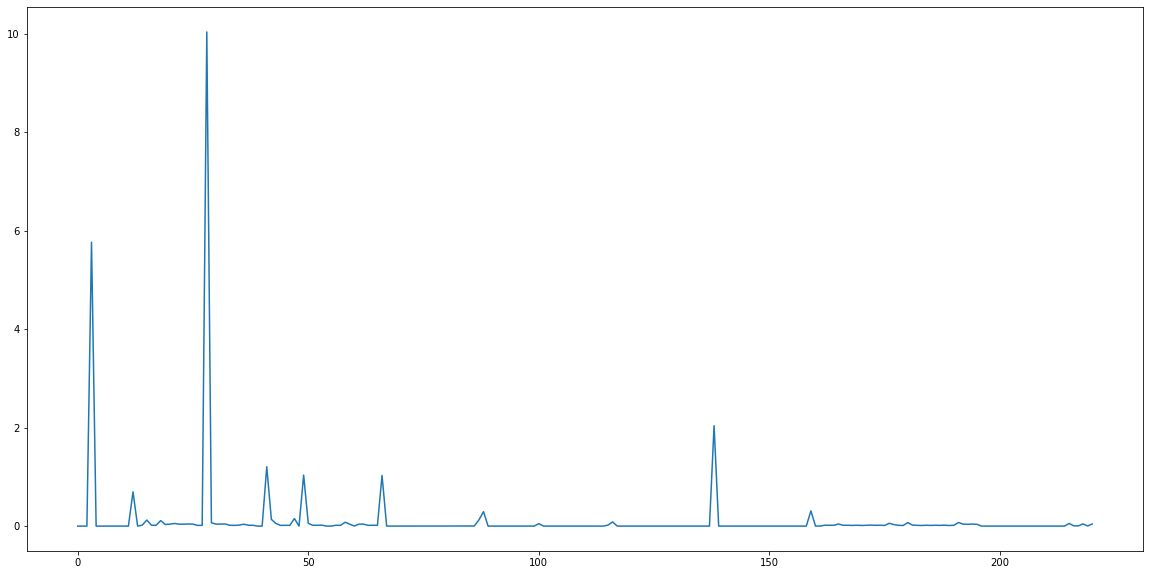

In [21]:
plt.figure(figsize=(20, 10))
plt.plot(data_time.Time)

We can therefor focus on the ones that take the most time.

<BarContainer object of 9 artists>

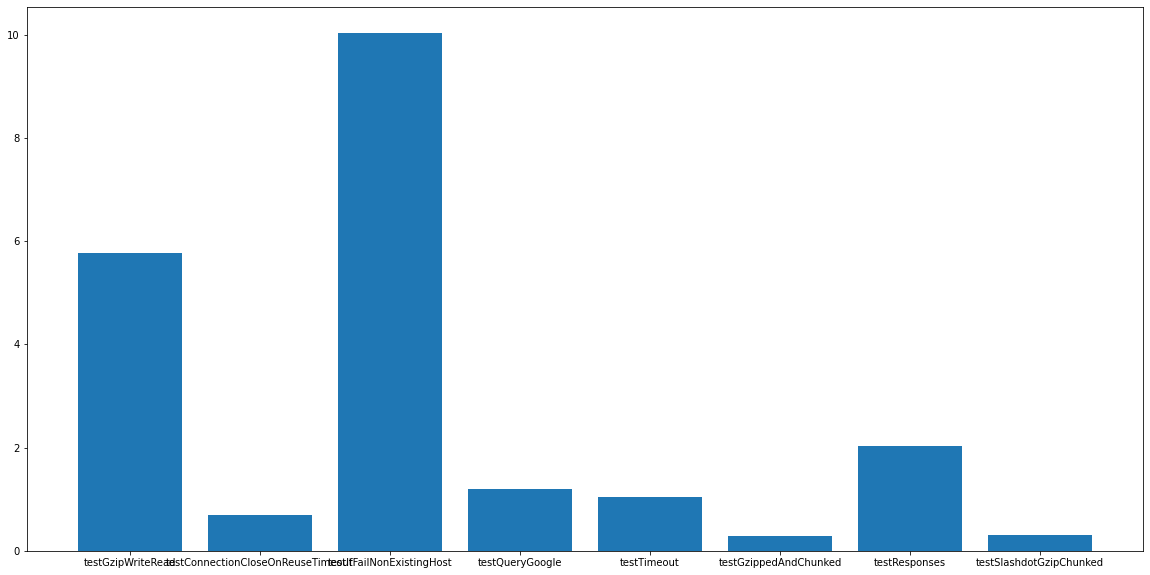

In [27]:
plt.figure(figsize=(20, 10))
df = data_time[data_time.Time > 0.2]
plt.bar(df.Name, df.Time)

In [9]:
data_time.Time.mean()

0.11470588235294109

In [10]:
data_time.Time.median()

0.0

In [11]:
data_time.Time.max()

10.035

We can also observe the total time per class

In [12]:
data_time.groupby(['Class']).sum()

Time
Class                                                     
Windows64.Zinc.Tests.ZnBivalentWriteStreamTest       0.000
Windows64.Zinc.Tests.ZnChunkedStreamTest             5.765
Windows64.Zinc.Tests.ZnClientTest                   14.381
Windows64.Zinc.Tests.ZnDigestAuthenticatorTest       0.000
Windows64.Zinc.Tests.ZnDispatcherDelegateTest        0.017
Windows64.Zinc.Tests.ZnEasyTest                      1.287
Windows64.Zinc.Tests.ZnEntityReaderTest              0.000
Windows64.Zinc.Tests.ZnEntityTest                    0.003
Windows64.Zinc.Tests.ZnEntityWriterTest              0.417
Windows64.Zinc.Tests.ZnHeadersTest                   0.000
Windows64.Zinc.Tests.ZnHtmlOutputStreamTest          0.050
Windows64.Zinc.Tests.ZnImageExampleDelegateTest      0.105
Windows64.Zinc.Tests.ZnLimitedReadStreamTest         0.000
Windows64.Zinc.Tests.ZnLineReaderTest                0.000
Windows64.Zinc.Tests.ZnMagicCookieJarTest            0.001
Windows64.Zinc.Tests.ZnMagicCookieTest               0.000
Windows64.Zinc.Tests.ZnMessageBenchmarkTest          2.039
Windows64.Zinc.Tests.ZnRequestLineTest               0.000
Windows64.Zinc.Tests.ZnRequestTest                   0.000
Windows64.Zinc.Tests.ZnResponseTest                  0.309
Windows64.Zinc.Tests.ZnServerTest                    0.598
Windows64.Zinc.Tests.ZnStaticFileServerDelegate...   0.226
Windows64.Zinc.Tests.ZnStatusLineTest                0.000
Windows64.Zinc.Tests.ZnUserAgentSessionTest          0.000
Windows64.Zinc.Tests.ZnUtilsTest                     0.152

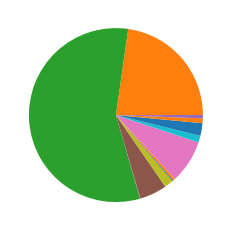

In [17]:
plt.pie(data_time.groupby(['Class'])['Time'].sum())
plt.show()

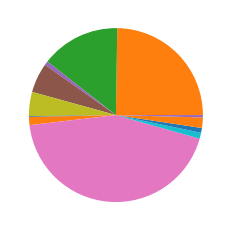

In [16]:
plt.pie(data_time.groupby(['Class'])['Time'].mean())
plt.show()

In [15]:
data_fail = data.dropna(axis=0)

In [16]:
data_fail

Class                       Name    Time  \
28  Windows64.Zinc.Tests.ZnClientTest  testIfFailNonExistingHost  10.035   

   Failure_Type   Failure_Message  \
28  TestFailure  Assertion failed   

                                         Failure_Text  
28  TestFailure\r\nAssertion failed\r\nZnClientTes...

In [19]:
data_fail.Failure_Text

28    TestFailure\r\nAssertion failed\r\nZnClientTes...
Name: Failure_Text, dtype: object

There are not enought failures to drow statistics from this dataframe.